### Matching time-series data

This notebook is designed to demonstrate a process common to various MIR tasks: matching time-series data. 

Below we run an experiment to check performance of different distance functions in matching two time-series data via rolling one over the other and computing distance at each step. One  MIR task that uses such a process is tonality detection via template matching on pitch class distributions.

__Experimental set-up:__
An array of random values (with size 20) called 'signature' is embedded within two arrays: 
__signal1__: an array of size 60, where the first 20 samples contains the 'signature' and the last 40 samples are zero
__signal2__: an array of size 60 composed of 20 random values followed by the signature followed by other 20 random values.

The experiment rolls/shifts signal-1 over signal-2 to check best matching point (which is index 20) and plots the distances computed after each roll/shift. We expect the lowest distance to be at shift-index 20.

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [2]:
def get_distance(shifted_recording, tab_model, distance_type):
    if distance_type == 'cityblock':
        return distance.cityblock(shifted_recording, tab_model)
    if distance_type == 'euclidean':
        return distance.euclidean(shifted_recording, tab_model)
    if distance_type == 'canberra':
        return distance.canberra(shifted_recording, tab_model)
    #Below, similarity functions are inverted(1-) to obtain distance-like representation
    if distance_type == 'correlation':
        return 1-np.dot(shifted_recording, tab_model)
    if distance_type == 'intersection':
        temp_min_function = np.minimum(shifted_recording, tab_model)
        return 1-sum(temp_min_function)
    

#### Demonstrating one case with plots

A sample for signal-1 and signal-2 that carries a common signature. We will be rolling signal-1 over signal-2 to find the best matching point/shift index.


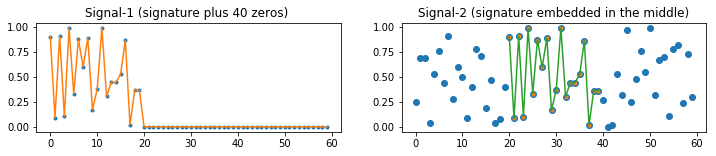

In [3]:
signature= np.random.rand(1,20)[0]

signal1=np.hstack((signature,np.zeros(40)))
signal2=np.hstack((np.random.rand(1,20)[0],signature,np.random.rand(1,20)[0]))

plt.figure(figsize=(12, 2))
plt.subplot(1,2, 1)
plt.plot(signal1,'.')
plt.plot(signal1)
plt.title('Signal-1 (signature plus 40 zeros) ')
plt.subplot(1,2, 2)
plt.plot(signal2,'o')
plt.plot(range(20,40),signature,'.')
plt.plot(range(20,40),signature)
plt.title('Signal-2 (signature embedded in the middle)')
print('A sample for signal-1 and signal-2 that carries a common signature. We will be rolling signal-1 over signal-2 to find the best matching point/shift index.')

#### Main Experiment

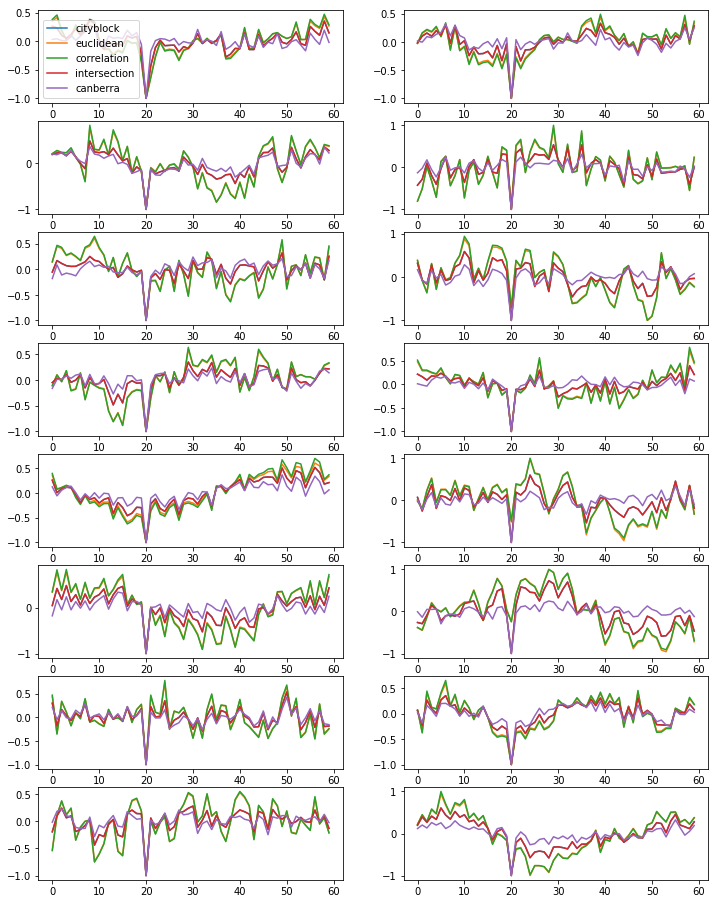

In [4]:
dist_measures=['cityblock','euclidean','correlation','intersection','canberra']
numExperiments=16
plt.figure(figsize=(12, numExperiments))
plotInd=1
for expInd in range(numExperiments):
    #Creating the signature and the signals containing the signature
    signature= np.random.rand(1,20)[0]

    signal1=np.hstack((signature,np.zeros(40)))
    signal2=np.hstack((np.random.rand(1,20)[0],signature,np.random.rand(1,20)[0]))

    #-------------------
    plt.subplot(numExperiments/2,2, plotInd)
    for distance_type in dist_measures:
        dist=[]
        for k in range(signal1.size):
            shifted=np.roll(signal1,k)
            dist.append(get_distance(shifted, signal2, distance_type))
        dist=np.array(dist)
        dist=dist-np.mean(dist)
        dist=dist/np.max(np.abs(dist))
        plt.plot(dist,label=distance_type)
    if plotInd==1:
        plt.legend(loc='best')
    plotInd+=1
